# Multiple regression of `Sales` on `Price`, `Urban`, and `US ` features in `Carseats` dataset

## Preparing the dataset

The `Carseats` dataset is part of the `ISLR` R package. We'll use [`rpy2` to import `ISLR` into python](https://rpy2.readthedocs.io/en/version_2.8.x/introduction.html)

In [1]:
import numpy as np
import pandas as pd

carseats = pd.read_csv('../../datasets/Carseats.csv')

We'll check for null entries

In [2]:
carseats.isna().sum().sum()

0

## (a) Fitting the model

Both `Urban` and `US` are binary class variables, so we can represent both by indicator variables (see [section 3.3.1](../../Notes.ipynb#qualpred)).

To encode the qualitative variables `Urban` and `US`, we'll use a `LabelEncoder` from `sklearn`

In [3]:
from sklearn.preprocessing import LabelEncoder

# instantiate and encode labels
urban_le, us_le = LabelEncoder(), LabelEncoder()
urban_le.fit(carseats.Urban.unique())
us_le.fit(carseats.US.unique())

LabelEncoder()

In [4]:
urban_le.classes_

array(['No', 'Yes'], dtype=object)

Now we'll create a dataframe with the qualitative variables numerically encoded

In [5]:
# copy
carseats_enc = carseats.copy()

# transform columns
carseats_enc.loc[ :, 'Urban'] = urban_le.transform(carseats['Urban'])
carseats_enc.loc[ :, 'US'] = us_le.transform(carseats['US'])

carseats_enc[['Urban', 'US']].head()

,Urban,US
0,1,1
1,1,1
2,1,1
3,1,1
4,1,0


Now we can fit the model

In [6]:
import statsmodels.formula.api as smf

model = smf.ols('Sales ~ Urban + US + Price', data=carseats_enc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           2.39e-23
Time:                        15:41:28   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0435      0.651     20.036      0.000      11.764      14.323
Urban         -0.0219      0.272     -0.081      0.936      -0.556       0.512
US             1.2006      0.259      4.635      0.000       0.691       1.710
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## (b) Interpreting the coefficients

In [7]:
model.params

Intercept    13.043469
Urban        -0.021916
US            1.200573
Price        -0.054459
dtype: float64

`Carseats` has carseat sales data for 400 stores <sup><a href='#foot0' id='ref0'>0</a></sup>

can interpret these coefficients as follows

1. The intercept $\hat{\beta}_0 = 13.04$ is the (estimated/predicted) average sales for carseats sold for free (`Price=0`) outside the US (`US='No'`) and outside a city (`Urban='No'`). 

2. $\hat{\beta}_0 + \hat{\beta}_1 = 13.02$ is the estimated average sales for carseats sold in cities outside the US

3. $\hat{\beta}_0 + \hat{\beta}_2 = 14.24$ is the estimated average sales for carseats sold outside cities in the US

4. $\hat{\beta}_0 + \hat{\beta}_1 + \hat{\beta}_2 = 14.22$ is the estimated average sales for carseats sold in cities in the US

5. $\hat{\beta}_3 = -0.05$ so a $1 increase in price is estimated to decrease sales by 

## (c) The formal model

Here we write the model in equation form. Let $X_1$ be `Urban`, $X_2$ be `US`, $X_3$ be `Price`. Then the model is

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3
$$

For the $i$-th observation, we have
$$ 
\begin{align*}
y_i &= \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \beta_3 x_{i3}\\
&= \begin{cases} \beta_0 + \beta_3 x_{i3} & \text{i-th carseat was sold outside a city, and outside the US}\\
\beta_0 + \beta_1 + \beta_3 x_{i3} & \text{i-th carseat was sold in a city outside the US}\\
\beta_0 + \beta_2 + \beta_3 x_{i3} & \text{i-th carseat was sold outside a city in the US}\\
\beta_0 + \beta_1 + \beta_2 + \beta_3 x_{i3} & \text{i-th carseat was sold in a US city}\\
\end{cases}
\end{align*}
$$

## (d) Significant Variables

In [8]:
is_stat_sig = model.pvalues < 0.05
model.pvalues[is_stat_sig]

Intercept    3.626602e-62
US           4.860245e-06
Price        1.609917e-22
dtype: float64

So we reject the null hypothesis $H_0: \beta_i = 0$ for $i=2, 3$, that is for the variables `US` and `price`.

In [9]:
model.pvalues[~ is_stat_sig]

Urban    0.935739
dtype: float64

 We fail to reject the null hypothesis for $i=1$, that is for the variables `Urban`

## (e) Fitting a second model with `price`, `US` features

On the basis of (d), we fit a new model with only the `price` and `US` variables

In [10]:
model_2 = smf.ols('Sales ~ US + Price', data=carseats_enc).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           2.66e-24
Time:                        15:41:28   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US             1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## (f) Goodness-of-fit for the two models

One way of determining how well the models fit the data is the $R^2$ values

In [11]:
print("The first model has R^2 = {}".format(round(model.rsquared, 3)))
print("The second model has R^2 = {}".format(round(model_2.rsquared, 3)))

The first model has R^2 = 0.239
The second model has R^2 = 0.239


So as far as the $R^2$ value is concerned, the models are equivalent. To choose one over the other, we might look at prediction accuracy, comparing mean squared errors, for example

In [12]:
print("The first model has model mean squared error {}".format(round(model.mse_model, 3)))
print("The first model has residual mean squared error {}".format(round(model.mse_resid, 3)))
print("The first model has total mean squared error {}".format(round(model.mse_total, 3)))

The first model has model mean squared error 253.813
The first model has residual mean squared error 6.113
The first model has total mean squared error 7.976


In [13]:
print("The second model has model mean squared error {}".format(round(model_2.mse_model, 3)))
print("The second model has residual mean squared error {}".format(round(model_2.mse_resid, 3)))
print("The second model has total mean squared error {}".format(round(model_2.mse_total, 3)))

The second model has model mean squared error 380.7
The second model has residual mean squared error 6.098
The second model has total mean squared error 7.976


In [14]:
print("The second model's model mse is {}% of the first".format(
      round(((model_2.mse_model - model.mse_model) * 100) / model.mse_model, 3)))
print("The second model's residual mse is {}% of the first".format(
      round(((model_2.mse_resid - model.mse_resid) * 100) / model.mse_resid, 3)))
print("The second model's total mse is {}% of the first".format(
      round(((model_2.mse_total - model.mse_total) * 100) / model.mse_total, 3)))

The second model's model mse is 49.992% of the first
The second model's residual mse is -0.25% of the first
The second model's total mse is 0.0% of the first


The `statsmodel` documentation has [descriptions of these mean squared errors]<sup><a href='#foot1' id='ref1'>1</a></sup>(https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html). 

- The model mean squared error is "the explained sum of squares divided by the model degrees of freedom" 
- The residual mean squared error is "the sum of squared residuals divided by the residual degrees of freedom" 
- The total mean squared error is "the uncentered total sum of squares divided by n the number of observations"

In OLS multiple regression with $n$ observations and $p$ predictors, the number of model degrees of freedom are $p$, the number of residual degrees of freedom are $n - p - 1$, so we have

$$\mathbf{mse}_{model} = \frac{1}{p}\left(\sum_{i = 1}^n (\hat{y}_i - \overline{y})^2\right)$$
$$\mathbf{mse}_{resid} = \frac{1}{n - p - 1}\left(\sum_{i = 1}^n (\hat{y}_i - y_i)^2\right)$$
$$\mathbf{mse}_{total} = \frac{1}{n}\left(\sum_{i = 1}^n (y_i - \overline{y})^2\right)$$

From this we can draw some conclusions

- It's clear why $\mathbf{mse}_{total}$ for the two models in this problem
- The error $\mathbf{mse}_{resid}$ is slightly smaller ($0.25\%$) for the second model, so it's slightly at predicting the response.
- The error $\mathbf{mse}_{resid}$ is much larger ($50\%$) for the second model, so for this model the response predictions have a much greater deviation from average

From this perspective, the first model seems preferable, but it's difficult to say. The tiebreaker should come from their performance on test data.

## (g) Confidence intervals for coefficients in the second model

In [15]:
model_2.conf_int()

,0,1
Intercept,11.79032,14.271265
US,0.69152,1.707766
Price,-0.06476,-0.044195


## (h) Outliers and high leverage points in the second model

To check for outliers we look at a standardized residuals vs fitted values plot

Text(0,0.5,'studentized resid')

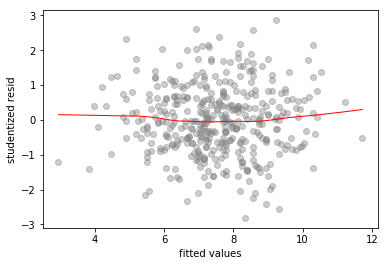

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.regplot(model_2.get_prediction().summary_frame()['mean'], model_2.resid/model_2.resid.std(),
            lowess=True,
            line_kws={'color':'r', 'lw':1},
            scatter_kws={'facecolors':'grey', 'edgecolors':'grey', 'alpha':0.4})
plt.xlabel('fitted values')
plt.ylabel('studentized resid')

No outliers -- all the studentized residual values are in the interval

In [17]:
((model_2.resid/model_2.resid.std()).min(), (model_2.resid/model_2.resid.std()).max())

(-2.812135116227541, 2.8627420897506766)

To check for high influence points we do an influence plot

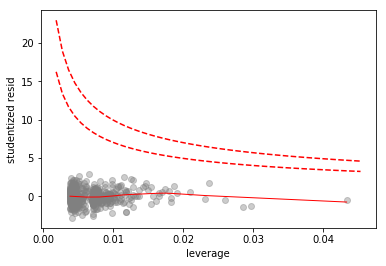

In [18]:
# scatterplot of leverage vs studentized residuals
axes = sns.regplot(model_2.get_influence().hat_matrix_diag, model_2.resid/model_2.resid.std(), 
            lowess=True, 
            line_kws={'color':'r', 'lw':1},
            scatter_kws={'facecolors':'grey', 'edgecolors':'grey', 'alpha':0.4})
plt.xlabel('leverage')
plt.ylabel('studentized resid')

# plot Cook's distance contours for D = 0.5, D = 1
x = np.linspace(axes.get_xlim()[0], axes.get_xlim()[1], 50)
plt.plot(x, np.sqrt(0.5*(1 - x)/x), color='red', linestyle='dashed')
plt.plot(x, np.sqrt((1 - x)/x), color='red', linestyle='dashed')

No high influence points. There is one rather high leverage point, but it has a low residual.

___
## Footnotes

<p>
</p>

<div id="foot0"> 0. For the authors's exploration of this dataset, see section 3.6.6 in the text 
<a href="#ref0">↩</a>
</div>

<p>
</p>

<div id="foot0"> 1. Related quantities in the book are ESS, RSS and TSS, respectively. The three are related by $TSS = ESS + RSS$. The book doesn't mention ESS explicitly, but $ESS = TSS - RSS$
<a href="#ref0">↩</a>
</div>